<a href="https://colab.research.google.com/github/restrepo/anomaly/blob/main/Type_II_Dirac_Seesaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solutions for effective Dirac neutrino masses from an Abelian Gauge Symmetry with massive chiral singlet fermions
For details see [arXiv:2108.05907](https://arxiv.org/pdf/2108.05907), Sec. 3.2

## Data Scheme
![img](https://raw.githubusercontent.com/restrepo/anomaly/main/schema.svg)

In [1]:
import pandas as pd
import numpy as np
import itertools

In [2]:
pd.set_option('display.max_colwidth',500)

### Load full solutions

In [3]:
ds=pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')
ds.shape

(390074, 5)

## Build new `n=10,11,12` solutions

In [4]:
z=pd.Series(dtype=float)
for i in range(5,9):
    for j in range(5,9):
        if i+j>12 or i>j:
            continue
        print(i,j)
        x=ds[ds['n']==i]['solution'].reset_index(drop=True)
        y=ds[ds['n']==j]['solution'].reset_index(drop=True)
        for k in y.index:
            z=z.append(x.apply( lambda l: l+y.loc[k] ).apply(lambda l: sorted(l,key=abs))).reset_index(drop=True)

5 5
5 6
5 7
6 6


In [5]:
df=pd.DataFrame()
df['solution']=z

In [6]:
df=df[~df['solution'].astype(str).duplicated()].reset_index(drop=True)

In [7]:
df['n']=df['solution'].apply(lambda l: len(l))

In [8]:
ds=ds.append(df).reset_index(drop=True)

In [9]:
for k in ['l','k']:
    ds[k]=ds[k].apply(lambda f: [] if isinstance(f,float) else f)

In [10]:
ds=ds[~ds['solution'].astype(str).duplicated()].reset_index(drop=True)

In [11]:
ds.shape

(413572, 5)

$n=11$

In [13]:
z=pd.DataFrame()
for n in [5,6]:
    for m in range(1,31):
        ll=[-m,-m,-m,m,m,m]
        zz=ds[ds['n']==n].reset_index(drop=True)
        zz['solution']=zz['solution'].apply(lambda l:l+ll if m not in l and -m not in l else [])
        zz['n']=zz['solution'].apply(len)
        z=z.append(zz).reset_index(drop=True)
        z=z[z['n']>0].reset_index(drop=True)

In [14]:
z.shape

(3766, 5)

In [15]:
z[~z['solution'].astype(str).duplicated()].shape

(3766, 5)

In [16]:
z

,l,k,solution,gcd,n
0,"[-2, -1]","[0, -1]","[2, 4, -7, -9, 10, -1, -1, -1, 1, 1, 1]",1.0,11
1,"[-2, -1]","[0, -3]","[5, 8, -14, -26, 27, -1, -1, -1, 1, 1, 1]",1.0,11
2,"[-1, -2]","[0, -3]","[7, 13, -25, -27, 32, -1, -1, -1, 1, 1, 1]",1.0,11
3,"[2, 1]","[0, -3]","[7, 9, -20, -22, 26, -1, -1, -1, 1, 1, 1]",1.0,11
4,"[-1, -2]","[0, -4]","[7, 8, -18, -22, 25, -1, -1, -1, 1, 1, 1]",2.0,11
...,...,...,...,...,...
3761,"[0, 5]","[-5, -2, -8]","[5, -8, -19, 25, 29, -32, -30, -30, -30, 30, 30, 30]",75.0,12
3762,"[2, -5]","[-9, 1]","[2, -9, -9, 19, 23, -26, -30, -30, -30, 30, 30, 30]",35.0,12
3763,"[1, 6]","[-2, 1, 0]","[2, 4, 13, -22, -29, 32, -30, -30, -30, 30, 30, 30]",6.0,12
3764,"[0, -6]","[-4, -7, -2]","[1, 4, 14, -22, -28, 31, -30, -30, -30, 30, 30, 30]",4.0,12


## Filter two set of repeated charges
with one of them repeated 3 times
$$(\nu,\nu[,\nu],\psi_1,\psi_2,\cdots)$$


In [17]:
#at least one set of repeated numbers
dsp=ds[ds['solution'].apply(lambda l: len(l)-len(set(l))>0)].reset_index(drop=True)
dsp.shape

(296884, 5)

Some reordering

In [18]:
dsp['nmax']=dsp['solution'].apply(lambda l: map(abs,l)).apply(max)
dsp=dsp.sort_values(['n','nmax']).reset_index(drop=True)
dsp2=dsp.copy()
dsp3=dsp.copy()
dsp4=dsp.copy()

#Show the first and last one solutions
dsp#.iloc[[0,1,2,-1]]

,l,k,solution,gcd,n,nmax
0,"[-1, -2]","[-1, 2]","[1, 1, 1, -4, -4, 5]",1.0,6,5
1,"[-1, 1]","[-2, 0]","[1, -2, -3, 5, 5, -6]",1.0,6,6
2,"[0, 1]","[-1, -3, 1]","[1, 1, 5, -9, -9, 11]",2.0,6,11
3,"[1, -2]","[-4, 1]","[1, -4, -4, 9, 9, -11]",3.0,6,11
4,"[-2, -1]","[-2, -3]","[2, 2, 3, -8, -12, 13]",1.0,6,13
...,...,...,...,...,...,...
296879,[],[],"[2, 2, 4, 4, 13, 13, -22, -22, -29, -29, 32, 32]",NaN,12,32
296880,[],[],"[1, 2, 4, 4, 13, 14, -22, -22, -28, -29, 31, 32]",NaN,12,32
296881,[],[],"[2, 4, 13, 17, -18, -22, -22, 25, 25, -27, -29, 32]",NaN,12,32
296882,[],[],"[8, -13, -17, 17, -18, -22, 25, 25, 27, 27, -27, -32]",NaN,12,32


## 1. Check effective conditions

$$ \nu+m+\delta s=0$$

$$ \psi_i+\psi_j=|s|$$

In [19]:
def get_massless(l,s,rank=True):
    if len(l)==0:
        return []
    elif len(l)==1:
        mssls=[(l[0],l[0])]
    elif len(l)==2:
        mssls=[tuple(l)]
    else:
        mssls=set([x for x in itertools.permutations(l,2) if x[0]<=x[1] ])
    xs=[]
    massless=[] # zero eigenvalues when rank is not enough
    for x in mssls:
        if abs(x[0]+x[1])==abs(s):
            xs.append(x)  # ←→ xs=[ x for x in mssls if abs(x[0]+x[1])==abs(s) ] for rank=False
            #Check the matrix rank and store zero eigenvalues
            nr=l.count(x[0])-l.count(x[1])            
            if rank and nr>0 and abs(2*x[0])!=abs(s):
                massless=massless+ [ x[0] for i in range(nr)]
            elif rank and nr<0 and abs(2*x[1])!=abs(s):
                massless=massless+ [ x[1] for i in range(abs(nr))]
            #Check repetead massive

    #flatten list of lists into list
    massive=[x for sublist in xs for x in sublist]
    extra_massless=[]
    if rank:
        extra_massless=list(set([x for x in massive if massive.count(x)>1]))
        extra_massless=[x for x in extra_massless if abs(2*x)!=abs(s)]

    return list( set(l).difference(set(massive)) ) + massless + extra_massless  

def get_sp(massless):
    """
    For a list of numbers `x_i` find the best `sp` value such that
    all the elements of the list satisfy:
       |sp|=|x_i + x_j|
    * If the list is already empty return None
    * If not found `sp` returns 0
    """
    if len(massless)==0:
        return None
    elif len(massless)==1:
        drs=[(massless[0],massless[0])]
    elif len(massless)==2:
        drs=[tuple(massless)]
    else:
        drs=[x for x in itertools.permutations(massless,2) if x[0]<=x[1]]
    sps=set(abs(sum(x)) for x in drs)    
    for sp in sps:
        msv =([dr for dr in drs if abs(sum(dr))==sp])
        massive=set([x for sublist in msv for x in sublist])
        msl=([dr for dr in drs if abs(sum(dr))!=sp])
        massless=set( [x for sublist in msl for x in sublist])
        majorana=massless.difference(massive)
        majorana=[m for m in majorana if abs(2*m)!=sp]
        if not majorana:
            return sp
        else:
            return 0        

In [21]:
#l=[1,-9,-9,-9,13,18,18,18,-19,-22]
#def conditions(l):
def condition(l,δ=1,rank=True):
#if True:   
    sls=[]
    ms=set([x for x in l if l.count(x)==3])
    if not ms:
        ms={0}
    νs=set([x for x in l if l.count(x)==2 or l.count(x)==3])
    mνs=[(m,ν) for m in ms for ν in νs if m!=ν]
    sold=0
    for mν in mνs:
        m=mν[0]
        ν=mν[1]
        if l.count(-ν)==3:
            continue #vector-like solution
        s=(-m-ν)/δ
        if float(s)-int(s)==0:
            s=int(s)
        else:
            continue
        if abs(s)==abs(sold):
            continue
        else:
            sold=s
        ψs=[x for x in l if x!=ν and x!=m]
        msslss=get_massless(ψs,s,rank=rank)
        sp=get_sp(msslss)
        d={'m':m,'ν':ν,'s':s,'massless':msslss,'sp':sp,'δ':δ}
        sls.append(d)
    #sp=None    
    solutions=[d for d in sls if d.get('massless')==[]]
    if not solutions:
        solutions=[d for d in sls if d.get('sp')]    
    return solutions

l=[1, 2, -6, -6, -6, 8, 9, 9, -11]
assert condition(l)[0].get('massless')==[]
l=[1, 1, 1, -4, -4, 5]
assert condition(l)[0].get('sp')==10
l=[1,-9,-9,-9,13,18,18,18,-19,-22]
#m=0
assert condition(l)[0].get('sp')==18
l=[1, -2, -3, 5, 5, -6]
assert condition(l)[0].get('massless')==[]
#zero eigenvalues with repeated charges → -20
l=[13, 13, -16, -16, -20, -20, 23, 29, 29, 29, -32, -32]
assert condition(l,rank=False)[0]['massless']==[]
assert condition(l,rank=True)[0]['massless']==[-20]
#zero eigenvalues with non-repeated charges → -11,-17
l=[4, -7, -7, 10, -11, 14, 15, -17, 18, -21, -22, 24]
assert condition(l,rank=False)[0]['massless']==[]
assert len(condition(l,rank=True)[0]['massless'])==2

In [22]:
def unconditional_stability(row,ZN={6:(2,3),10:(2,5),15:(3,5)},DMs={},check_massless=True):
    '''
    According to appendix of arXiv:1911.05515, 
    generalized to any N
    
    '''
    if check_massless:
        sd=[d for d in row['effective'] if d.get('massless')==[]]
    else:
        sd=row['effective']
        
    for i in range(len(sd)):
        DMs={}
        d=sd[i]
        N=abs(d['s'])
        l=[n for n in row['solution'] if n not in [d['m'],d['ν']] ]
        #Check for non-hidden chiral fermions
        if 0 in np.array(l)%N:
            DMs={'None':tuple([])}
            continue
        DM=[x for x in itertools.permutations(l,2) 
               if x[0]<=x[1] and abs(sum(x))==N ]
        DM=DM+[(n,n) for n in l if abs(2*n)==N]
        #rank 0
        for dm in DM:
            if dm[0]!=dm[1] and l.count(dm[0])!=l.count(dm[1]) and abs(2*dm[0])!=N and abs(2*dm[0])!=N:
                DMs={'None':tuple([])}
        #missing massles → TODO: Check BUG
        if check_massless and np.setdiff1d(l,[item for sublist in DM for item in sublist]).size>0:
            DMs={'None':tuple([])}
        if not DMs.get('None')==():
            try:
                p,q=ZN[N]
            except KeyError:
                DMs={'None':tuple([])}
                continue
            ps=[n*p for n in range(1,N) if n*p<N]
            qs=[n*q for n in range(1,N) if n*q<N]
            ω=[ sorted([y%N for y in x]) for x in DM]
            DMF=['ψ' if np.setdiff1d(x,ps).size==0 else 'χ' 
                   if np.setdiff1d(x,qs).size==0 else 'None' for x in  ω ]
            DMs=dict(zip(DMF,DM))
            break
    return DMs

In [23]:
dsp['effective']=dsp['solution'].apply(condition)

In [24]:
dsp=dsp[dsp['effective'].apply(len)>0].reset_index(drop=True)

In [25]:
p=np.array( [2,3,5,7,11,13,17,19,23,29,31] )
q=p.copy()
zpq= [ pp*qq for pp in p for qq in q if pp<qq] 
Zpq=sorted( set( zpq ) )

In [26]:
pqs=[ (pp,qq) for pp in p for qq in q if pp<qq]
ZN=dict(zip(Zpq,pqs))

In [27]:
Zpq[:3]

[6, 10, 14]

In [28]:
dsp['DMs']=dsp.apply(lambda row: unconditional_stability(row,ZN,check_massless=False)  ,axis='columns')

In [29]:
dsp.shape

(17872, 8)

In [30]:
dspm=dsp[dsp['effective'].apply(lambda l: [d for d in l if not d.get('massless')]).apply(len)>0].reset_index(drop=True)
dspm.shape

(1006, 8)

In [29]:
#dspm[dspm['DMs'].apply(lambda d: 'ψ' in d.keys() and 'χ' in d.keys())].reset_index(drop=True)

$\delta=2$

In [30]:
dsp2.shape

(296884, 6)

In [31]:
dsp2['effective']=dsp2['solution'].apply(lambda l:condition(l,δ=2))

In [32]:
dsp2=dsp2[dsp2['effective'].apply(len)>0].reset_index(drop=True)

In [33]:
dsp2['DMs']=dsp2.apply(lambda row: unconditional_stability(row,ZN,check_massless=False)  ,axis='columns')

In [34]:
dsp2.shape

(7095, 8)

In [35]:
dspm2=dsp2[dsp2['effective'].apply(lambda l: [d for d in l if not d.get('massless')]).apply(len)>0].reset_index(drop=True)
dspm2.shape

(72, 8)

In [36]:
#dspm2[dspm2['DMs'].apply(lambda d: 'ψ' in d.keys() and 'χ' in d.keys())].reset_index(drop=True)

Massive solutions with a single $S$

In [37]:
dslt=dspm.append(dspm2).reset_index(drop=True)
dslt.shape

(1078, 8)

In [38]:
dslt=dslt.sort_values(['n','nmax']).reset_index(drop=True)

There are 1078 solutions most of them with $N=10$ integers

In [39]:
dslt[dslt['n']==10].shape

(923, 8)

In [72]:
def count_dm(row):
#if True:
    e=row['effective']
    dm=[]
    for d in e:
        l=list(set(row['solution'].copy()))
        dmd={}
        if len(d.get('massless'))>0:
            print('NOT IMPLEMEMTED YET')
            continue
        if d.get('m'):
            l.remove( d.get('m') )
        l.remove(d.get('ν'))
        if len(l)==0:
            mssls=[()]
        elif len(l)==1:
            mssls=[(l[0],l[0])]
        elif len(l)==2:
            mssls=[tuple(l)]
        else:
            mssls=list(set([x for x in itertools.permutations(l,2) if x[0]<=x[1] ]))
        massive=[ x for x in mssls if len(mssls[0])>0 and abs(x[0]+x[1])==abs(d.get('s')) ]
        #Check generations
        gnrt=[row['solution'].count(x[0])-1 for x in massive]
        dgnrt=0
        if gnrt:
            dgnrt=max(gnrt)#int( sum( [x for x in gnrt if x>0]  ) )
        nd=len(massive)+dgnrt
        massive=[x for x in l if abs(2*x)==abs(d.get('s')) ]
        gnrt=[row['solution'].count(x)-1 for x in massive]
        mgnrt=0
        if gnrt:
            mgnrt=max(gnrt)#int( sum( [x for x in gnrt if x>0]  ) )        
        nm=len(massive)+mgnrt        
        ac=False
        if d.get('m'):
            ac=True
        uc=False
        if 'ψ' in row['DMs'].keys() and 'χ' in row['DMs'].keys():
            uc=True
        dm.append({'active':ac,'dirac':nd,'majorana':nm,'extra_generations':(dgnrt,mgnrt),'n':row['n'],'unconditional':uc,'δ':d.get('δ')})
        if len(dm)>1:
            dm=[eval(y) for y in set( [str(x) for x in dm]) ]
    
    return dm

In [48]:
ll=[2, 2, 3, 4, 4, -5, -6, -6, -7, 9]
row={}
d={'m': 0, 'ν': 2, 's': -2, 'massless': [], 'sp': None, 'δ': 1}
row['solution']=ll
row['effective']=[d]
row['DMs']={}
row['n']=10
count_dm(row)

[{'active': False,
  'dirac': 4,
  'majorana': 0,
  'extra_generations': (1, 0),
  'n': 10,
  'unconditional': False,
  'δ': 1}]

In [73]:
ll=[2, 2, 4, 4, -7, -7, -9, -9, 10, 10]
row={}
d={'m': 0, 'ν': 10, 's': -5, 'massless': [], 'sp': None, 'δ': 2}
row['solution']=ll
row['effective']=[d]
row['DMs']={}
row['n']=10
count_dm(row)

[{'active': False,
  'dirac': 3,
  'majorana': 0,
  'extra_generations': (1, 0),
  'n': 10,
  'unconditional': False,
  'δ': 2}]

In [74]:
dslt['features']=dslt.apply(count_dm,axis='columns')

In [75]:
fnl=dslt[~dslt['features'].astype(str).duplicated()].reset_index(drop=True)

Families of massive solutions

In [76]:
fnl.shape

(43, 9)

In [187]:
fnl

,l,k,solution,gcd,n,nmax,effective,DMs,features
0,"[-1, 1]","[-2, 0]","[1, -2, -3, 5, 5, -6]",1.0,6,6,"[{'m': 0, 'ν': 5, 's': -5, 'massless': [], 'sp': None, 'δ': 1}]",{'None': ()},"[{'active': False, 'dirac': 2, 'majorana': 0, 'extra_generations': (0, 0), 'n': 6, 'unconditional': False, 'δ': 1}]"
1,"[-3, -1]","[-2, -3, 1]","[3, 3, 3, -5, -5, -7, 8]",1.0,7,8,"[{'m': 3, 'ν': -5, 's': 1, 'massless': [], 'sp': None, 'δ': 2}]",{'None': ()},"[{'active': True, 'dirac': 1, 'majorana': 0, 'extra_generations': (0, 0), 'n': 7, 'unconditional': False, 'δ': 2}]"
2,"[1, 2, 1, -1]","[-6, -3, -5, -3]","[1, 2, -6, -6, -6, 8, 9, 9, -11]",1.0,9,11,"[{'m': -6, 'ν': 9, 's': -3, 'massless': [], 'sp': None, 'δ': 1}]",{'None': ()},"[{'active': True, 'dirac': 2, 'majorana': 0, 'extra_generations': (0, 0), 'n': 9, 'unconditional': False, 'δ': 1}]"
3,"[3, -4, 5]","[-4, -3, 1, -3]","[1, -3, 8, 8, 8, -12, -12, -17, 19]",4.0,9,19,"[{'m': 8, 'ν': -12, 's': 2, 'massless': [], 'sp': None, 'δ': 2}]",{'None': ()},"[{'active': True, 'dirac': 2, 'majorana': 1, 'extra_generations': (0, 0), 'n': 9, 'unconditional': False, 'δ': 2}]"
4,"[-1, 4, 2]","[-3, -8, 3, 4]","[8, 8, 8, -12, -12, 15, -17, -23, 25]",10.0,9,25,"[{'m': 8, 'ν': -12, 's': 2, 'massless': [], 'sp': None, 'δ': 2}]",{'None': ()},"[{'active': True, 'dirac': 2, 'majorana': 0, 'extra_generations': (0, 0), 'n': 9, 'unconditional': False, 'δ': 2}]"
5,"[-3, 1, 2, -2]","[-4, -3, -4, -2, 0]","[1, -2, -2, 3, 3, -4, -4, 6, 6, -7]",1.0,10,7,"[{'m': 0, 'ν': 6, 's': -6, 'massless': [], 'sp': None, 'δ': 1}]","{'χ': (3, 3), 'ψ': (-4, -2), 'None': (-7, 1)}","[{'active': False, 'dirac': 3, 'majorana': 2, 'extra_generations': (1, 1), 'n': 10, 'unconditional': True, 'δ': 1}]"
6,"[-2, -1, 0, 1]","[-5, -6, -4, 1]","[1, -2, -2, 3, 4, -5, -5, 7, 7, -8]",1.0,10,8,"[{'m': 0, 'ν': -5, 's': 5, 'massless': [], 'sp': None, 'δ': 1}, {'m': 0, 'ν': 7, 's': -7, 'massless': [], 'sp': None, 'δ': 1}]",{'None': ()},"[{'active': False, 'dirac': 4, 'majorana': 0, 'extra_generations': (1, 0), 'n': 10, 'unconditional': False, 'δ': 1}]"
7,"[1, -1, 0, 2]","[-3, -2, 2, 0, 1]","[1, -2, -2, 3, 5, -6, -6, 8, 8, -9]",1.0,10,9,"[{'m': 0, 'ν': 8, 's': -8, 'massless': [], 'sp': None, 'δ': 1}, {'m': 0, 'ν': -6, 's': 6, 'massless': [], 'sp': None, 'δ': 1}]","{'None': (1, 5), 'ψ': (-2, 8), 'χ': (3, 3)}","[{'active': False, 'dirac': 4, 'majorana': 1, 'extra_generations': (1, 0), 'n': 10, 'unconditional': True, 'δ': 1}, {'active': False, 'dirac': 4, 'majorana': 0, 'extra_generations': (1, 0), 'n': 10, 'unconditional': True, 'δ': 1}]"
8,"[2, 0, 3, -1]","[-2, -3, -2, 2, 0]","[2, 2, 3, 4, 4, -5, -6, -6, -7, 9]",1.0,10,9,"[{'m': 0, 'ν': 2, 's': -2, 'massless': [], 'sp': None, 'δ': 1}, {'m': 0, 'ν': 4, 's': -4, 'massless': [], 'sp': None, 'δ': 1}]",{'None': ()},"[{'active': False, 'dirac': 4, 'majorana': 0, 'extra_generations': (1, 0), 'n': 10, 'unconditional': False, 'δ': 1}, {'active': False, 'dirac': 4, 'majorana': 2, 'extra_generations': (1, 1), 'n': 10, 'unconditional': False, 'δ': 1}]"
9,"[-2, -1, 1, 2]","[-2, -1, 0, 1]","[2, 2, 4, 4, -7, -7, -9, -9, 10, 10]",2.0,10,10,"[{'m': 0, 'ν': 10, 's': -5, 'massless': [], 'sp': None, 'δ': 2}]",{'None': ()},"[{'active': False, 'dirac': 3, 'majorana': 0, 'extra_generations': (1, 0), 'n': 10, 'unconditional': False, 'δ': 2}]"


__Active symmetry with D-5__


From 2 to 3 massive Dirac fermions and until a Majorana massive fermion. In the case of solutions with uncoditional stability for two dark matter candidates, if the solution includes a Majorana massive fermion, it is protected by one of the renmant symmetries. In this case the number of singlet chiral fermions is $n-3=6,8$

In [188]:
#fnl[fnl['features'].apply(lambda l: True in [ True for d in l if d.get('active') and d.get('δ')==1 ])].reset_index(drop=True)

__Dark symmetry with D-6__

From 2 to 4 massive Dirac fermions and until a Majorana massive fermion. In the case of solutions with uncoditional stability for two dark matter candidates, if the solution includes a Majorana massive fermion

In [189]:
#fnl[fnl['features'].apply(lambda l: True in [ True for d in l if not d.get('active') and d.get('δ')==2 ])].reset_index(drop=True)

__Active symmetry with D-6__

In [190]:
#kk=fnl[fnl['features'].apply(lambda l: True in [ True for d in l if d.get('active') and d.get('δ')==2 ])].reset_index(drop=True)

In [81]:
%pylab inline
df=pd.DataFrame(fnl['features'].str[0].to_list())

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


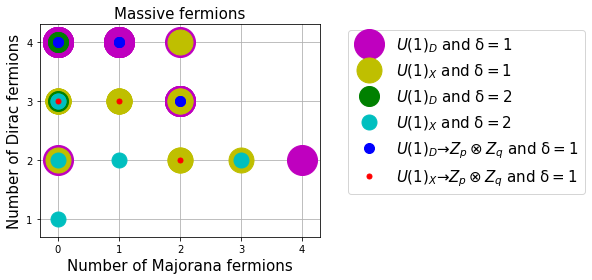

In [94]:
#https://stackoverflow.com/a/34880501
#Dark → δ=1
from matplotlib.ticker import MaxNLocator
#ax = plt.figure(figsize=(4,3)).gca()
ax = plt.figure(figsize=(9,4)).gca()
ax.plot(df[ ( (df['active']==False) & (df['δ']==1) ) ]['majorana'],
         df[ ( (df['active']==False) & (df['δ']==1) ) ]['dirac'],'mo',markersize=30,label=r'$U(1)_D\ \rm{and}\ \delta=1$')
#Active → δ=1
ax.plot(df[ ( (df['active']==True) & (df['δ']==1) ) ]['majorana'],
         df[ ( (df['active']==True) & (df['δ']==1) ) ]['dirac'],'yo',markersize=25,label=r'$U(1)_X\ \rm{and}\ \delta=1$')
#Dark → δ=2
ax.plot(df[ ( (df['active']==False) & (df['δ']==2) ) ]['majorana'],
         df[ ( (df['active']==False) & (df['δ']==2) ) ]['dirac'],'go',markersize=20,label=r'$U(1)_D\ \rm{and}\ \delta=2$')
#Active → δ=2
ax.plot(df[ ( (df['active']==True) & (df['δ']==2) ) ]['majorana'],
         df[ ( (df['active']==True) & (df['δ']==2) ) ]['dirac'],'co',markersize=15,label=r'$U(1)_X\ \rm{and}\ \delta=2$')


#Dark → δ=1 → unconditional
ax.plot(df[ ( (df['active']==False) & (df['δ']==1) & (df['unconditional']==True) ) ]['majorana'],
         df[ ( (df['active']==False) & (df['δ']==1) & (df['unconditional']==True) ) ]['dirac'],'bo',
         markersize=10,label=r'$U(1)_D \to Z_p\otimes Z_q\ \rm{and}\ \delta=1$')
#Active → δ=1 → unconditional
ax.plot(df[ ( (df['active']==True) & (df['δ']==1) & (df['unconditional']==True) ) ]['majorana'],
         df[ ( (df['active']==True) & (df['δ']==1) & (df['unconditional']==True) ) ]['dirac'],'ro',
        markersize=5,label=r'$U(1)_X \to Z_p\otimes Z_q\ \rm{and}\ \delta=1$')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel('Number of Majorana fermions',size=15)
ax.set_ylabel('Number of Dirac fermions',size=15)
ax.set_title('Massive fermions',fontsize=15)

ax.set_ylim(0.7,4.3)
ax.set_xlim(-0.3,4.3)
ax.grid()
ax.legend(loc=(1.1,0.2),fontsize=15)#,bbox_to_anchor=(2, 0.5))
plt.tight_layout()#rect=(0,0,1.6,1.2))
plt.subplots_adjust(right=0.5)
plt.savefig('number.pdf')

In [83]:
def get_generations(row):
    l=list(row['extra_generations'])
    if l[0]:
        l[0]=l[0]+1
    if l[0]==0 and row['dirac']:
        l[0]=l[0]+1
    if l[1]:
        l[1]=l[1]+1
    if l[1]==0 and row['majorana']:
        l[1]=l[1]+1
    return tuple(l)

In [84]:
df['generations']=df.apply(get_generations,axis='columns')

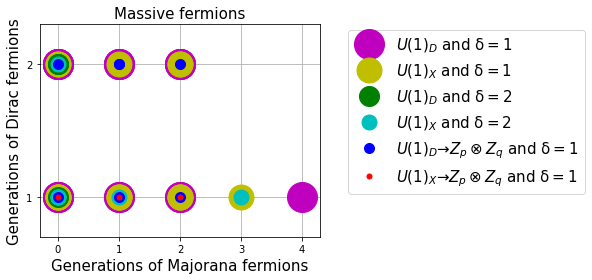

In [88]:
#https://stackoverflow.com/a/34880501
#Dark → δ=1
from matplotlib.ticker import MaxNLocator
ax = plt.figure(figsize=(9,4)).gca()
ax.plot(df[ ( (df['active']==False) & (df['δ']==1) ) ]['generations'].str[1],
         df[ ( (df['active']==False) & (df['δ']==1) ) ]['generations'].str[0],'mo',markersize=30,label=r'$U(1)_D\ \rm{and}\ \delta=1$')
#Active → δ=1
ax.plot(df[ ( (df['active']==True) & (df['δ']==1) ) ]['generations'].str[1],
         df[ ( (df['active']==True) & (df['δ']==1) ) ]['generations'].str[0],'yo',markersize=25,label=r'$U(1)_X\ \rm{and}\ \delta=1$')
#Dark → δ=2
ax.plot(df[ ( (df['active']==False) & (df['δ']==2) ) ]['generations'].str[1],
         df[ ( (df['active']==False) & (df['δ']==2) ) ]['generations'].str[0],'go',markersize=20,label=r'$U(1)_D\ \rm{and}\ \delta=2$')
#Active → δ=2
ax.plot(df[ ( (df['active']==True) & (df['δ']==2) ) ]['generations'].str[1],
         df[ ( (df['active']==True) & (df['δ']==2) ) ]['generations'].str[0],'co',markersize=15,label=r'$U(1)_X\ \rm{and}\ \delta=2$')


#Dark → δ=1 → unconditional
ax.plot(df[ ( (df['active']==False) & (df['δ']==1) & (df['unconditional']==True) ) ]['generations'].str[1],
         df[ ( (df['active']==False) & (df['δ']==1) & (df['unconditional']==True) ) ]['generations'].str[0],'bo',
         markersize=10,label=r'$U(1)_D \to Z_p\otimes Z_q\ \rm{and}\ \delta=1$')
#Active → δ=1 → unconditional
ax.plot(df[ ( (df['active']==True) & (df['δ']==1) & (df['unconditional']==True) ) ]['generations'].str[1],
         df[ ( (df['active']==True) & (df['δ']==1) & (df['unconditional']==True) ) ]['generations'].str[0],'ro',
        markersize=5,label=r'$U(1)_X \to Z_p\otimes Z_q\ \rm{and}\ \delta=1$')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel('Generations of Majorana fermions',size=15)
ax.set_ylabel('Generations of Dirac fermions',size=15)
ax.set_title('Massive fermions',fontsize=15)

ax.set_ylim(0.7,2.3)
ax.set_xlim(-0.3,4.3)
ax.grid()
ax.legend(loc=(1.1,0.2),fontsize=15)
plt.tight_layout()#rect=(0,0,1.6,1.2))
plt.subplots_adjust(right=0.5)
plt.savefig('generation.pdf')

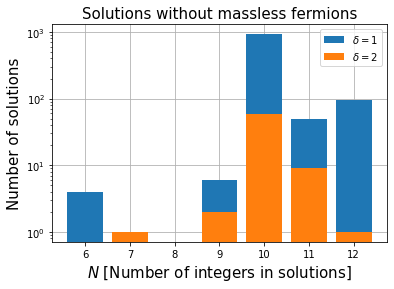

In [186]:
#https://stackoverflow.com/a/23358722/2268280
h=dslt.groupby('n')['nmax'].count()
hh=dslt[dslt.effective.str[0].str['δ']==2].groupby('n')['nmax'].count()
plt.grid(zorder=0)
plt.bar(list(h.keys()),h.values,log=True,zorder=2,label=r'$\delta=1$')
plt.bar(list(hh.keys()),hh.values,log=True,zorder=2,label=r'$\delta=2$')

plt.title('Solutions without massless fermions',fontsize=15)
plt.xlabel('$N$ [Number of integers in solutions]',size=15)
plt.ylabel('Number of solutions',size=15)
plt.legend(loc='best')
plt.savefig('solutions.pdf')


In [182]:
dsp3[dsp3['effective'].apply(lambda l: [d for d in l if not d.get('massless')]).apply(len)>0].reset_index(drop=True)

,l,k,solution,gcd,n,nmax,effective,DMs
0,"[3, -2, -1, 4]","[-2, -3, -1, -2, 4]","[3, -5, 10, 10, 10, -15, -16, -16, 17, -24, 26]",2.0,11,26,"[{'m': 10, 'ν': -16, 's': 2, 'massless': [], 'sp': None, 'δ': 3}]",{'None': ()}


In [183]:
dsp4['effective']=dsp4['solution'].apply(lambda l:condition(l,δ=4))

dsp4=dsp4[dsp4['effective'].apply(len)>0].reset_index(drop=True)

#dsp4['DMs']=dsp4.apply(lambda row: unconditional_stability(row,ZN,check_massless=False)  ,axis='columns')

dsp4.shape

(205, 8)

In [184]:
dsp4[dsp4['effective'].apply(lambda l: [d for d in l if not d.get('massless')]).apply(len)>0].reset_index(drop=True)

,l,k,solution,gcd,n,nmax,effective,DMs


# LaTeX table

In [230]:
tm=fnl.copy()
tm['uncstab']=fnl['DMs'].apply(lambda d: 'ψ' in d.keys() and 'χ' in d.keys())

In [246]:
tm['N']=tm.apply(lambda row: row['n']-3 if row['effective'][0]['m']!=0 else row['n'],axis='columns')

In [262]:
Zpq

[6,
 10,
 14,
 15,
 21,
 22,
 26,
 33,
 34,
 35,
 38,
 39,
 46,
 51,
 55,
 57,
 58,
 62,
 65,
 69,
 77,
 85,
 87,
 91,
 93,
 95,
 115,
 119,
 133,
 143,
 145,
 155,
 161,
 187,
 203,
 209,
 217,
 221,
 247,
 253,
 299,
 319,
 323,
 341,
 377,
 391,
 403,
 437,
 493,
 527,
 551,
 589,
 667,
 713,
 899]

In [273]:
tm['effective']=tm.apply(lambda row: [d for d in row['effective'] if abs(d.get('s')) in Zpq ] 
            if [d for d in row['effective'] if abs(d.get('s')) in Zpq ] else row['effective'] 
         ,axis='columns')

In [274]:
tm['m']=tm['effective'].str[0].str['m']
tm[r'\nu']=tm['effective'].str[0].str['ν']
tm['s']=tm['effective'].str[0].str['s']
tm[r'\delta']=tm['effective'].str[0].str['δ']

In [275]:
import re
def add_boldsymbol(ss):
    if str(ss).find(r'\boldsymbol')==-1:
        return re.sub('(\-*[0-9]+)',r'\\boldsymbol{\1}',str(ss))
    else:
        return ss

In [276]:
kk=tm[['solution','N','m',r'\nu',r'\delta','s','uncstab']].copy()

In [278]:
for i in kk.index:
    #for s in ['DD','DM','XD','XM']:
    kk['s']=kk.apply(lambda row: add_boldsymbol(row['s']) if row['uncstab'] else row['s'],axis='columns' )    

kkk=kk.drop('uncstab',axis='columns')#[['n','l','k','solution','gcd']]#Ref','DD','DM','XD','XM']]
def f(x):
    return  r'{}'.format(str(x).replace('[','(').replace(']',')'))

kkk.to_latex('solutions.tex',index=False,formatters=dict( [(k,f) for k in kk.columns ]) ,escape=False  )

In [279]:
cat solutions.tex

\begin{tabular}{lrrrrl}
\toprule
                                           solution &  N &   m & \nu & \delta &                s \\
\midrule
                              (1, -2, -3, 5, 5, -6) &  6 &   0 &   5 &      1 &               -5 \\
                           (3, 3, 3, -5, -5, -7, 8) &  4 &   3 &  -5 &      2 &                1 \\
                   (1, 2, -6, -6, -6, 8, 9, 9, -11) &  6 &  -6 &   9 &      1 &               -3 \\
                (1, -3, 8, 8, 8, -12, -12, -17, 19) &  6 &   8 & -12 &      2 &                2 \\
              (8, 8, 8, -12, -12, 15, -17, -23, 25) &  6 &   8 & -12 &      2 &                2 \\
                (1, -2, -2, 3, 3, -4, -4, 6, 6, -7) & 10 &   0 &   6 &      1 &  \boldsymbol{-6} \\
                (1, -2, -2, 3, 4, -5, -5, 7, 7, -8) & 10 &   0 &  -5 &      1 &                5 \\
                (1, -2, -2, 3, 5, -6, -6, 8, 8, -9) & 10 &   0 &  -6 &      1 &   \boldsymbol{6} \\
                 (2, 2, 3, 4, 4, -5, -6, -6, -7, 9) & 10 &